
<h1 align=left><font size = 5>Exploratory Data Analysis Report</font></h1>

Capstone Project: Insurance Company Benchmark

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

Dataset: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


 Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas-profiling
import pandas_profiling
import plotly.express as px

load data and store in dataframe InsData_ori:

In [ ]:
df_ori = pd.read_csv("/content/ticdata2000.txt",  delimiter = "\t",header=None)
df_ori.head()



0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  81  82  \
0  33   1   3   2   8   0   5   1   3   7  ...   0   0   0   1   0   0   0   
1  37   1   2   2   8   1   4   1   4   6  ...   0   0   0   1   0   0   0   
2  37   1   2   2   8   0   4   2   4   3  ...   0   0   0   1   0   0   0   
3   9   1   3   3   3   2   3   2   4   5  ...   0   0   0   1   0   0   0   
4  40   1   4   2  10   1   4   1   4   7  ...   0   0   0   1   0   0   0   

   83  84  85  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 86 columns]

In [ ]:
# add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr ' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']

df_ori


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0                  33                1                 3                2   
1                  37                1                 2                2   
2                  37                1                 2                2   
3                   9                1                 3                3   
4                  40                1                 4                2   
...               ...              ...               ...              ...   
5817               36                1                 1                2   
5818               35                1                 4                4   
5819               33                1                 3                4   
5820               34                1                 3                2   
5821               33                1                 3                3   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                    8                     0                       5   
1                    8                     1                       4   
2                    8                     0                       4   
3                    3                     2                       3   
4                   10                     1                       4   
...                ...                   ...                     ...   
5817                 8                     0                       6   
5818                 8                     1                       4   
5819                 8                     0                       6   
5820                 8                     0                       7   
5821                 8                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                     1               3               7  ...   
1                     1               4               6  ...   
2                     2               4               3  ...   
3                     2               4               5  ...   
4                     1               4               7  ...   
...                 ...             ...             ...  ...   
5817                  1               2               1  ...   
5818                  1               4               6  ...   
5819                  0               3               5  ...   
5820                  0               2               7  ...   
5821                  1               2               7  ...   

      po_no_ins_pol_accident_ins_pvt  po_no_ins_pol_accident_ins_fam  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
...                              ...                             ...   
5817                               0                               0   
5818                               0                               0   
5819                               0                               0   
5820                               0                               0   
5821                               0                               0   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
0                            0                   1                        0   
1                            0                   1                        0   
2                            0                   1                        0   
3                            0                   1                        0   
4                            0                   1                        0   
...                        ...                 ...                      ...   
5817                         

In [ ]:
# save file with headings to use in other tools
#df_ori.to_csv('/content/ticdata2000_wheading.csv')

In [ ]:
print('no of records and columns ',df_ori.shape)
# list the data types for each column
df_ori.dtypes

no of records and columns  (5822, 86)


sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
po_ins_pol_caravan               int64
Length: 86, dtype: object

In [ ]:
df_x=df_ori.iloc[:,0:8]
df_x.dtypes

sd_cust_subtype           int64
sd_no_of_houses           int64
sd_avg_household          int64
sd_avg_age_band           int64
sd_cust_maintype          int64
sd_religion_catholic      int64
sd_religion_protestant    int64
sd_religion_other         int64
dtype: object

# Profiling Report

In [ ]:
#  Get Exploratory data analysis report.
!pip install pandas-profiling
import pandas_profiling

In [ ]:
# full profile report
profile = df_ori.profile_report(title='Pandas Profiling Report - complete report')
profile.to_file(output_file="Pandas Profiling Report - complete report — Insurance Benchmark .html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# since the dataframe is too large, we produce profile report to view variable report. (corelation report will be generated separatly)
profile1 = df_ori.profile_report(title='Pandas Profiling Report - Original file',  minimal=True)
profile1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile1.to_file(output_file="Pandas Profiling Report — Original file .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 1. Data Cleaning

identifying and addressing duplicate entries

handling missing values, detecting and resolving inconsistencies,

detecting outliers, normalizing/standardizing the data, and carrying out variable transformations and feature engineering

**1.1 Identifying and addressing duplicate entries**

1) function df_ori.duplicated() shows 602 duplicates.

2) Further examined duplicates and checked records copying to a csv file.






In [ ]:
# Method1: checking duplicates
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df_ori[df_ori.duplicated()]

In [ ]:
display(duplicate)

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
4345               10                1                 3                3   
2427               10                1                 3                3   
1539               10                1                 4                3   
5360               10                1                 4                3   
2225               10                1                 4                3   
...               ...              ...               ...              ...   
2549                9                1                 4                3   
2145                9                1                 4                3   
2871                9                1                 4                3   
5528                9                1                 4                3   
5219                9                2                 3                2   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
4345                 3                     0                       4   
2427                 3                     2                       3   
1539                 3                     0                       5   
5360                 3                     0                       5   
2225                 3                     0                       5   
...                ...                   ...                     ...   
2549                 3                     1                       3   
2145                 3                     1                       3   
2871                 3                     1                       3   
5528                 3                     1                       3   
5219                 3                     0                       5   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
4345                  2               4               7  ...   
2427                  0               5               7  ...   
1539                  2               3               7  ...   
5360                  2               3               7  ...   
2225                  2               3               7  ...   
...                 ...             ...             ...  ...   
2549                  1               5               7  ...   
2145                  1               5               7  ...   
2871                  1               5               7  ...   
5528                  1               5               7  ...   
5219                  0               4               9  ...   

      po_no_ins_pol_accident_ins_fam  po_no_ins_pol_disability  \
4345                               0                         0   
2427                               0                         0   
1539                               0                         0   
5360                               0                         0   
2225                               0                         0   
...                              ...                       ...   
2549                               0                         0   
2145                               0                         0   
2871                               0                         0   
5528                               0                         0   
5219                               0                         0   

      po_no_ins_pol_fire  po_no_ins_pol_surfboard  po_no_ins_pol_boat  \
4345                   1                        0                   0   
2427                   0                        0                   0   
1539                   0                        0                   0   
5360                   0                        0                   0   
2225                   1                        0                   0   
...                  ...                      ...                 ...   
2549                   0                        0                   0   
2145                   0                        0                   0 

In [ ]:
# Method2: checking duplicates
# create a key 'sd_combined' combining contents of all columns and get counts of the key
columns = df_ori.columns.tolist()
df_ori['df_combined'] = df_ori.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)

In [ ]:
# these 6 records have same results
testA = df_ori[['df_combined']]
summaryA=testA.groupby('df_combined').filter(lambda x: len(x) == 6)
idnos = summaryA.index.tolist()
#summaryB=df_ori.loc[[5820,	3546,	3462,	4363,	4295,	4175 ]]
summaryB=df_ori.loc[idnos]
summaryB.to_csv('/content/duplicate_6.csv') # outputting to a csv file to examine records.
summaryA

df_combined
3462  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
3546  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
4175  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
4295  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
4363  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
5820  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...

6 records with index numbers 5820,3546,3462,4363, 4295, 4175 have same values in all attributes.

In [ ]:
testA.groupby('df_combined').filter(lambda x: len(x) > 1)

df_combined
5     23_1_2_1_5_0_5_0_5_0_6_3_3_5_2_0_5_4_2_0_0_4_2...
7     33_1_2_3_8_0_7_0_2_7_2_0_0_5_4_0_3_6_2_0_0_2_5...
13    41_1_3_3_10_0_5_0_4_7_1_1_1_4_5_2_4_4_3_0_1_2_...
15    33_1_2_3_8_0_7_0_2_7_2_0_0_5_4_0_3_6_2_0_0_2_5...
19    31_1_2_4_7_0_2_0_7_9_0_0_0_6_3_0_0_9_0_0_0_2_4...
...                                                 ...
5799  9_1_3_3_3_0_5_0_4_7_0_2_2_4_3_0_7_2_0_0_0_7_0_...
5804  23_1_2_2_5_2_4_1_3_3_3_4_4_3_2_2_4_4_1_0_0_2_3...
5805  33_1_3_3_8_0_6_1_2_6_0_3_2_3_5_1_2_6_1_0_1_4_2...
5810  33_1_3_2_8_0_4_0_5_9_0_0_0_3_6_0_4_5_0_0_0_2_5...
5820  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...

[1078 rows x 1 columns]

In [ ]:
# output records with index 739, 4345
df_ori.loc[[739, 4345 ]]

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
739                10                1                 3                3   
4345               10                1                 3                3   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
739                  3                     0                       4   
4345                 3                     0                       4   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
739                   2               4               7  ...   
4345                  2               4               7  ...   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
739                          0                   1                        0   
4345                         0                   1                        0   

      po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
739                    0                      0                       0   
4345                   0                      0                       0   

      po_no_ins_pol_social security  po_ins_pol_caravan  \
739                               0                   0   
4345                              0                   0   

                                            df_combined  \
739   10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...   
4345  10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...   

                                            sd_combined  
739   10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...  
4345  10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...  

[2 rows x 88 columns]

**Duplicate records were not removed from the file**

sociodemographic data are based on postal code. Customers from same postal code will have same data.Attributes from # 7 - 43 are scaled from 0 - 9 represent % range. eg . **4**  37 - 49%
The product variables represent a scale. Ex. 'po_ins_pol_car' : Contribution to car policy have values (0, 4, 6, 8)
It is possible to have more than one customer in the same category.

the dataset doesn’t provide a policy or customer number.
Hence, we decided to keep all records assuming all these are from genuine customers.
Duplicate records were not removed from the file

**1.2 Handling missing values**

From the profile report we recognise there are no missing values in the dataset.

In [ ]:
# checking all missing values in the dataset.
# here we check missing value count again for confirmation.
df_ori.isna().sum()

sd_cust_subtype                  0
sd_no_of_houses                  0
sd_avg_household                 0
sd_avg_age_band                  0
sd_cust_maintype                 0
                                ..
po_no_ins_pol_bicycle            0
po_no_ins_pol_property           0
po_no_ins_pol_social security    0
po_ins_pol_caravan               0
df_combined                      0
Length: 87, dtype: int64

**1.3 Detecting and resolving inconsistencies**

**Cheking relationship in religion variables**

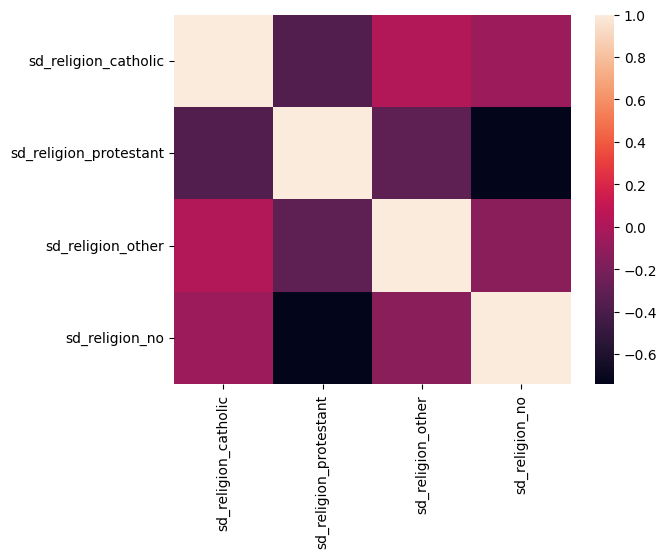

In [ ]:
df_rel = df_ori[['sd_religion_catholic', 'sd_religion_protestant', 'sd_religion_other', 'sd_religion_no']]

corr1 = df_rel .corr()
sns.heatmap(corr1,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_religion_columns.png", dpi=300)

attributes sd_religion_no and sd_religion_protestant are negatively correlated. ie when % sd_religion_no is less sd_religion_protestant is higher.
As we expect sd_religion_no is negatively correlated with rest of religion variables. So we can use sd_religion_no independently or other 3 variables together.


In [ ]:
df_rel.describe()

sd_religion_catholic  sd_religion_protestant  sd_religion_other  \
count           5822.000000             5822.000000        5822.000000   
mean               0.696496                4.626932           1.069907   
std                1.003234                1.715843           1.017503   
min                0.000000                0.000000           0.000000   
25%                0.000000                4.000000           0.000000   
50%                0.000000                5.000000           1.000000   
75%                1.000000                6.000000           2.000000   
max                9.000000                9.000000           5.000000   

       sd_religion_no  po_ins_pol_caravan  
count     5822.000000         5822.000000  
mean         3.258502            0.059773  
std          1.597647            0.237087  
min          0.000000            0.000000  
25%          2.000000            0.000000  
50%          3.000000            0.000000  
75%          4.000000            0.000000  
max          9.000000            1.000000

*we see min/max values for religion variables are 0 - 9 as expected. No inconsistency.*

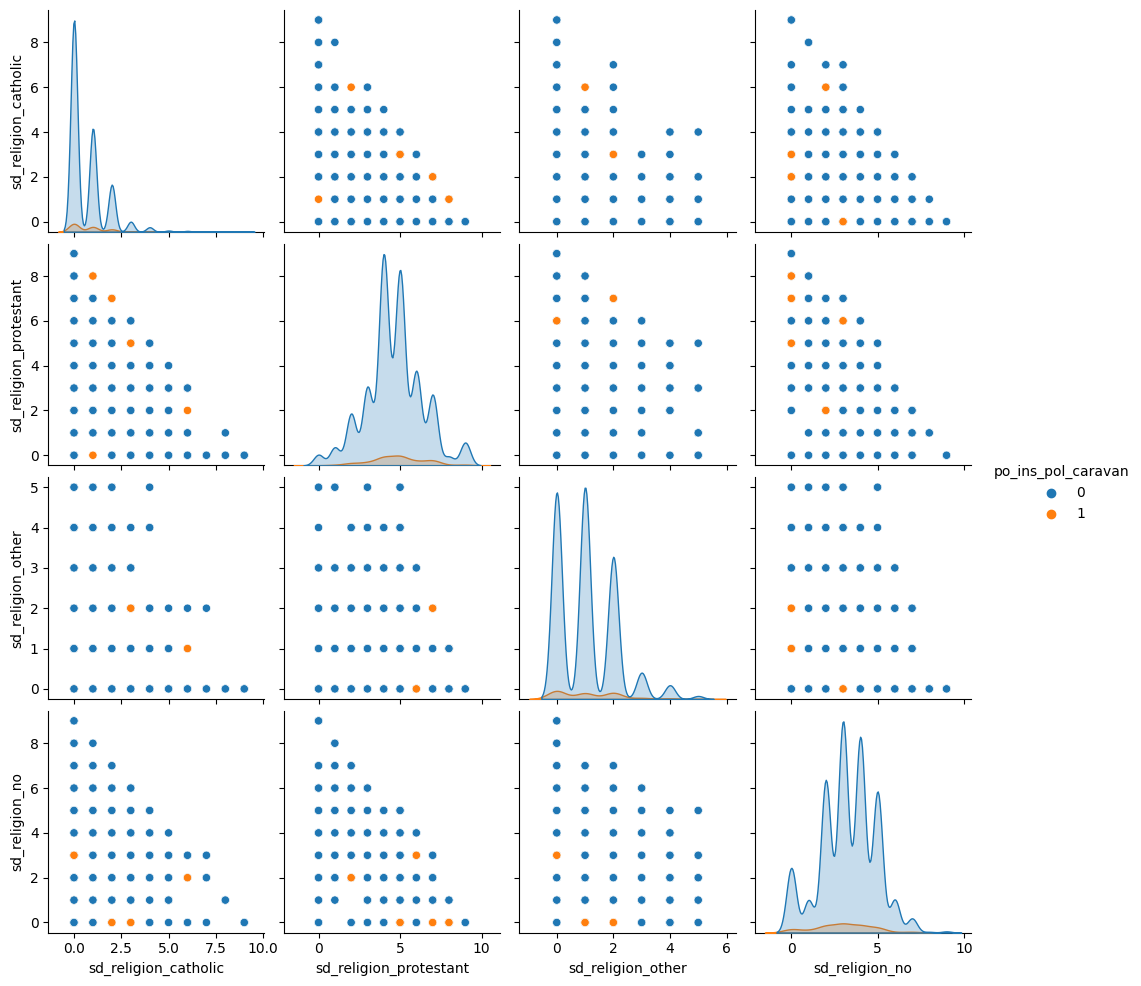

In [ ]:
df_rel = df_ori[['sd_religion_catholic', 'sd_religion_protestant', 'sd_religion_other', 'sd_religion_no', 'po_ins_pol_caravan']]
sns.pairplot(df_rel, hue="po_ins_pol_caravan")

sd_religion_no represent % of people without a religion. 0 0% - 9 100%
We see in pair plot having caravan insurance for lower sd_religion_no.ie people with religion is more tend to have a caravan policy.

**Checking relationship fields**

In [ ]:
df_rela = df_ori[['sd_rel_married', 'sd_rel_living_tg', 'sd_rel_other' ,'sd_rel_no_singles']]
df_rela.describe()

sd_rel_married  sd_rel_living_tg  sd_rel_other  sd_rel_no_singles
count     5822.000000       5822.000000   5822.000000        5822.000000
mean         6.183442          0.883545      2.290450           1.887667
std          1.909482          0.965924      1.722645           1.799928
min          0.000000          0.000000      0.000000           0.000000
25%          5.000000          0.000000      1.000000           0.000000
50%          6.000000          1.000000      2.000000           2.000000
75%          7.000000          1.000000      3.000000           3.000000
max          9.000000          7.000000      9.000000           9.000000

*min/max values of relationship variables are between 0 - 9 as expected.*

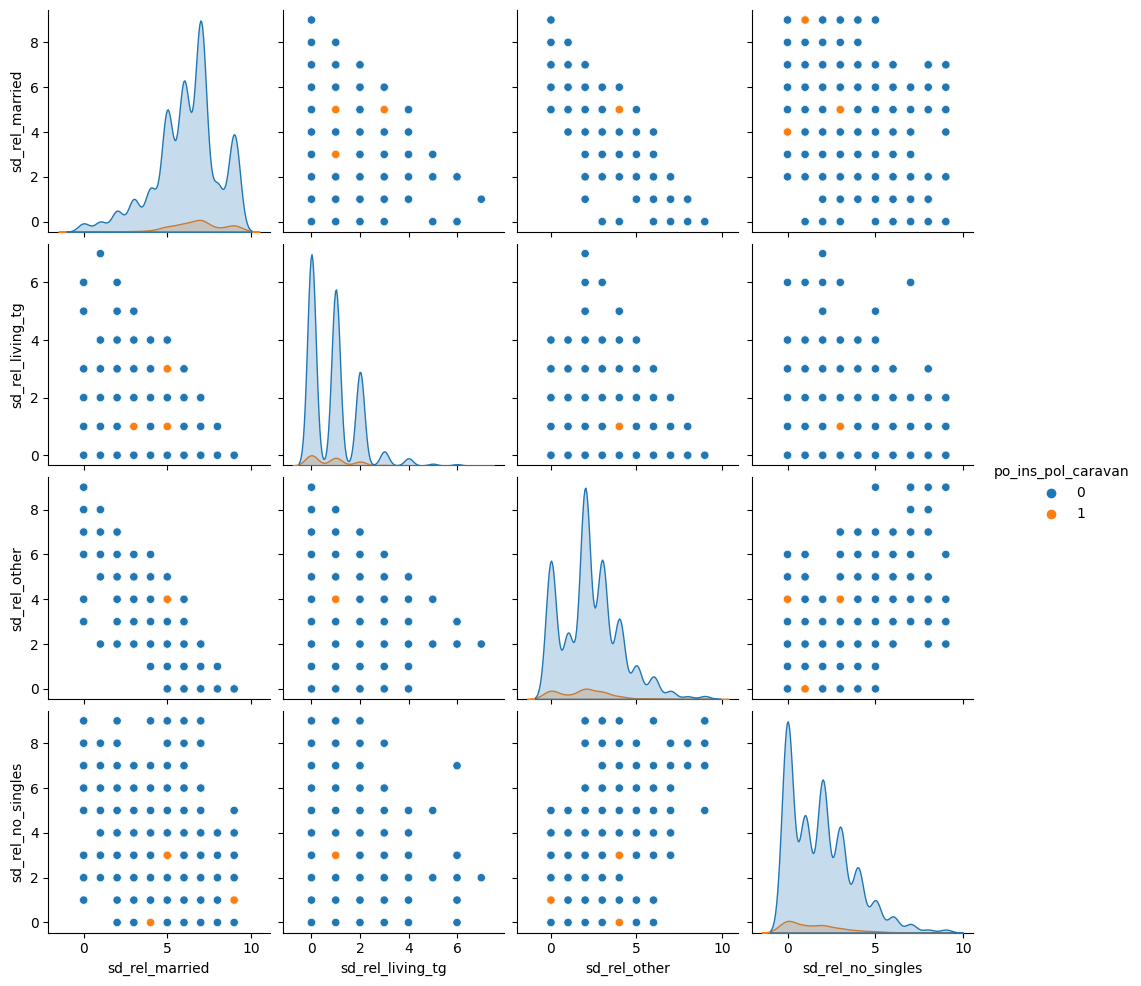

In [ ]:
df_rela = df_ori[['sd_rel_married', 'sd_rel_living_tg', 'sd_rel_other' ,'sd_rel_no_singles', 'po_ins_pol_caravan']]
sns.pairplot(df_rela, hue="po_ins_pol_caravan")


*we notice more caravan policies in areas with higher % of sd_rel_married  and lower % of no leationship.*

**checking education fields**

In [ ]:
df_edu = df_ori[['sd_education_higher', 'sd_education_medium', 'sd_education_lower']]
df_edu.describe()

sd_education_higher  sd_education_medium  sd_education_lower
count          5822.000000          5822.000000         5822.000000
mean              1.461010             3.351254            4.572484
std               1.622967             1.761052            2.298125
min               0.000000             0.000000            0.000000
25%               0.000000             2.000000            3.000000
50%               1.000000             3.000000            5.000000
75%               2.000000             4.000000            6.000000
max               9.000000             9.000000            9.000000

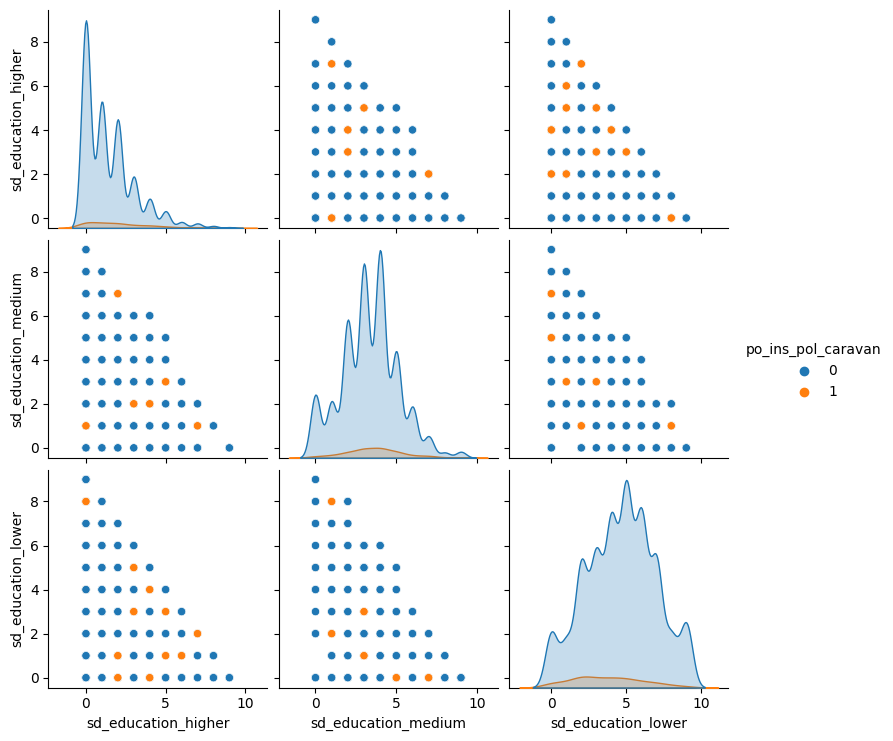

In [ ]:
df_edu = df_ori[['sd_education_higher', 'sd_education_medium', 'sd_education_lower', 'po_ins_pol_caravan']]
sns.pairplot(df_edu, hue="po_ins_pol_caravan")

*we notice more caravan polices with higher proportion of sd_education_higher and lower 'sd_education_lower'*

checking social class and income variables

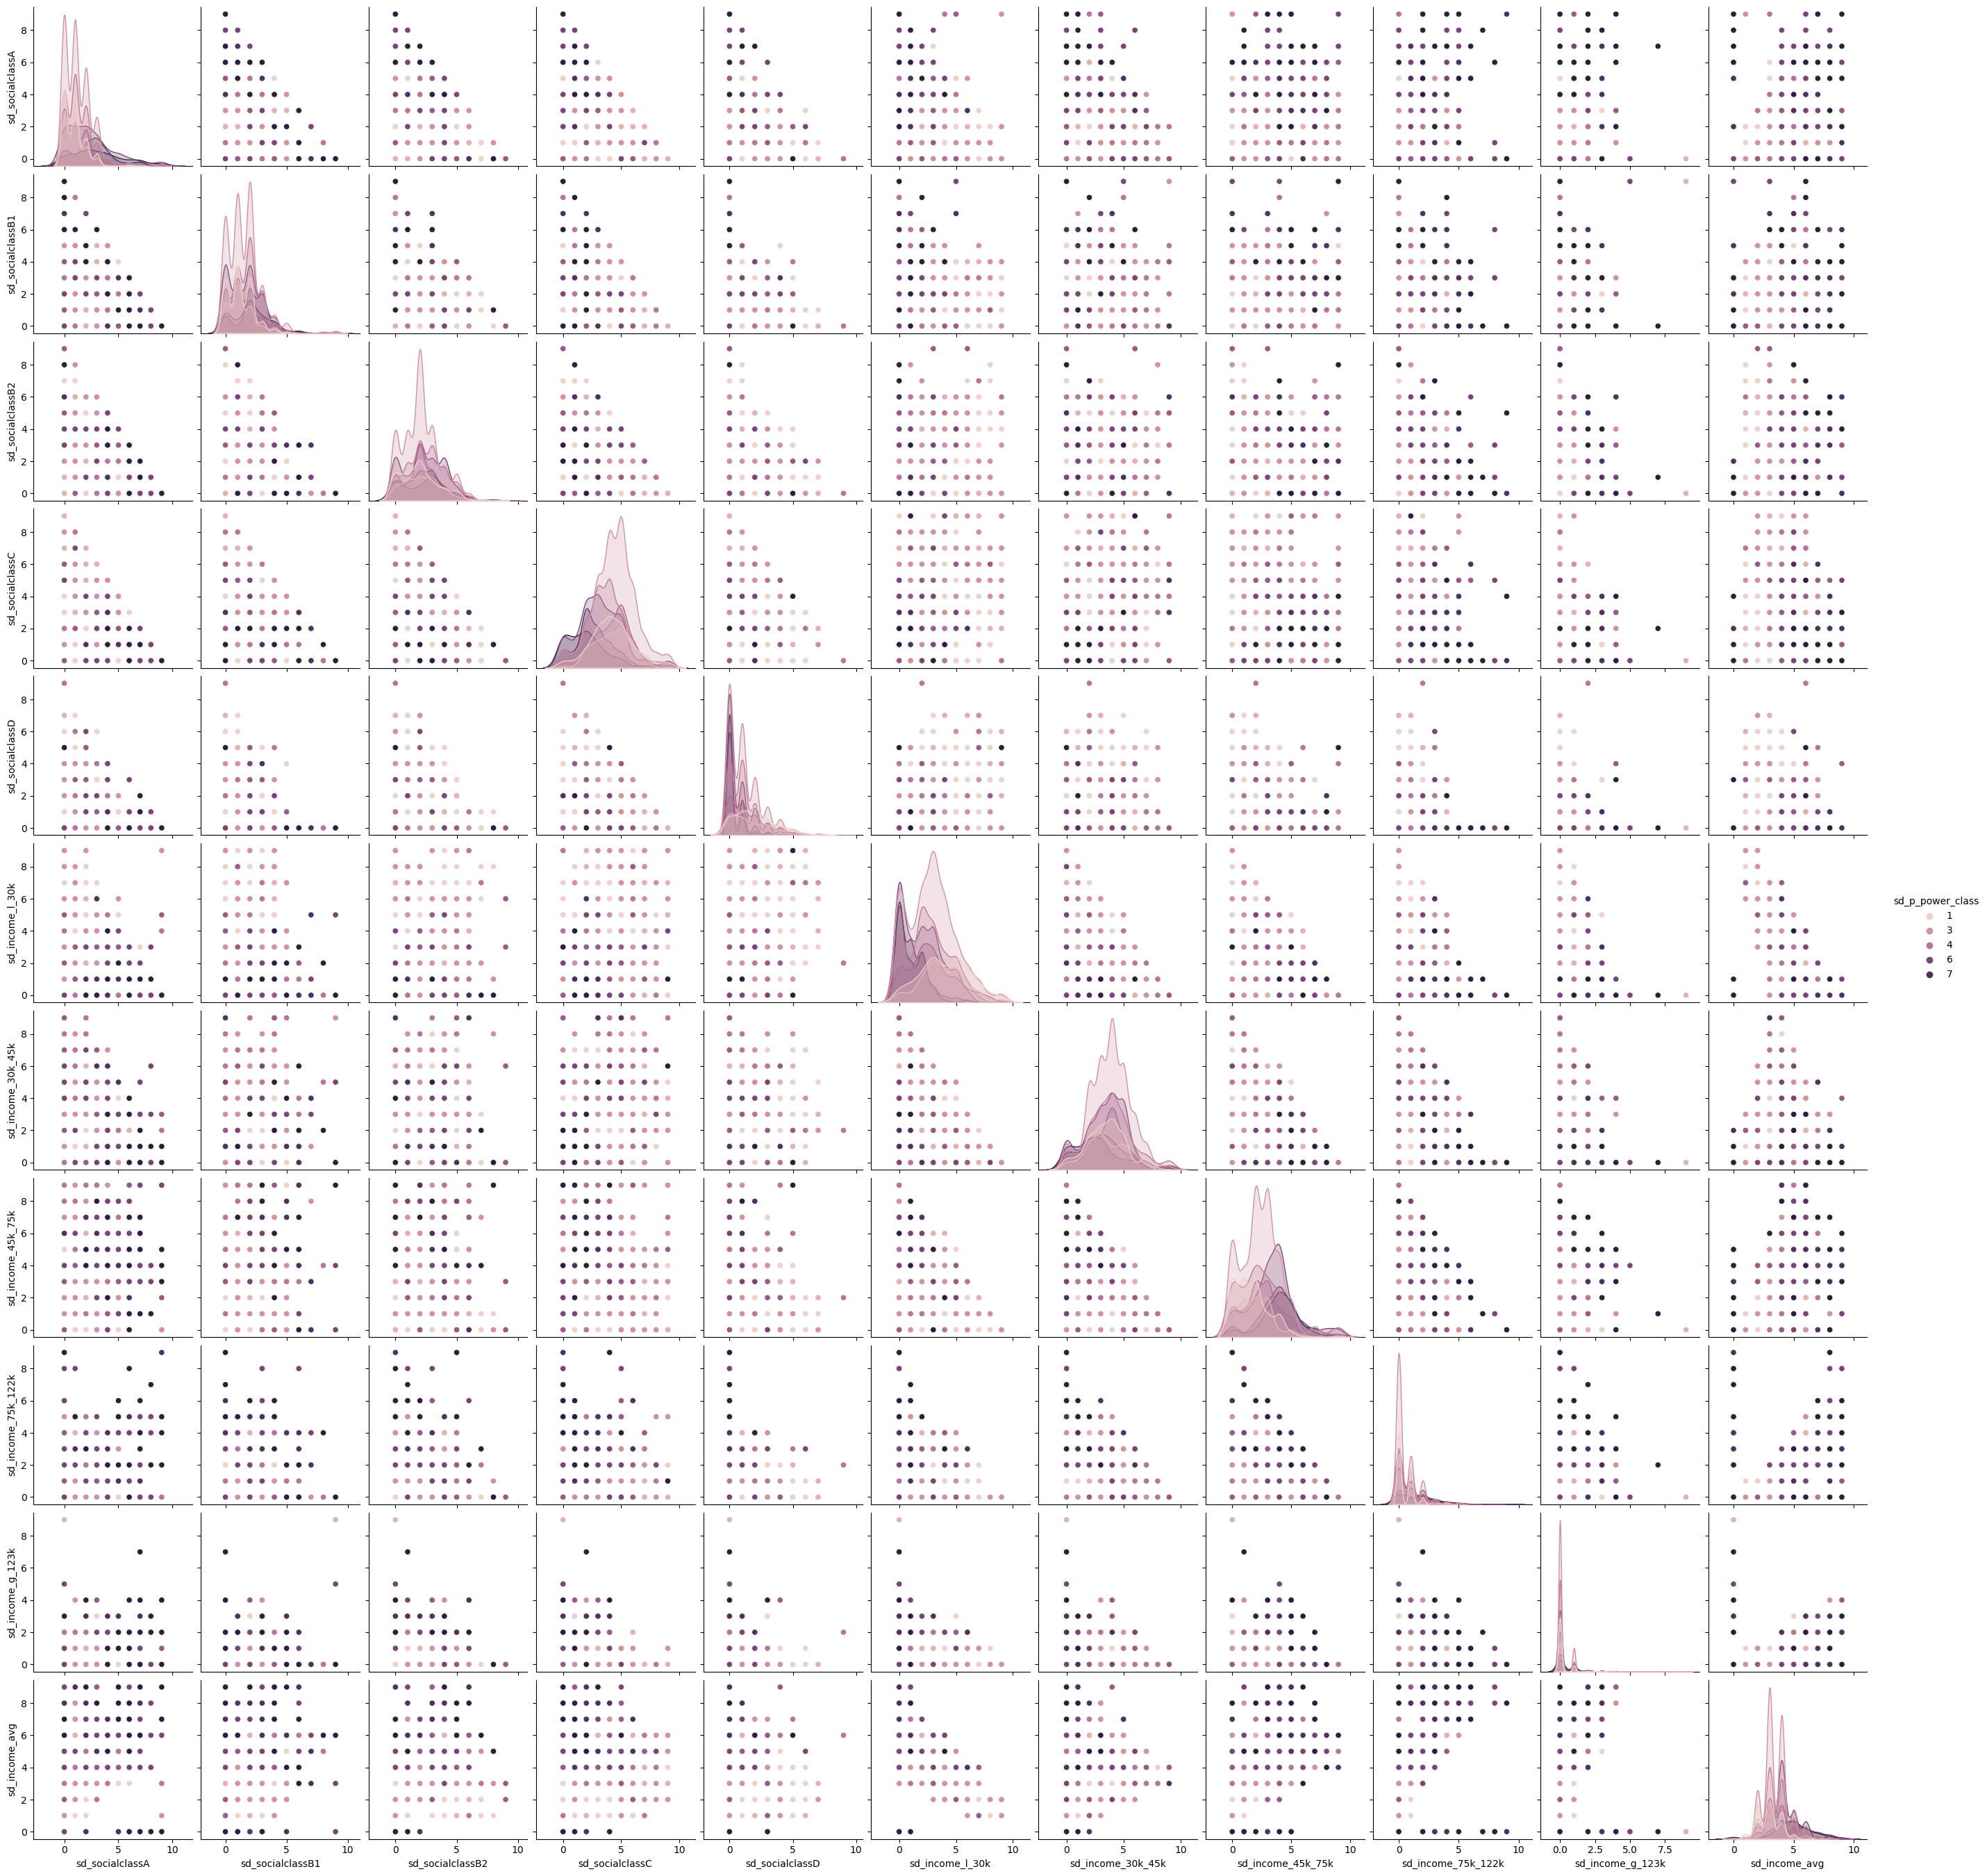

In [ ]:
df_sc = df_ori[['sd_socialclassA', 'sd_socialclassB1', 'sd_socialclassB2', 'sd_socialclassC', 'sd_socialclassD', 'sd_income_l_30k', 'sd_income_30k_45k', 'sd_income_45k_75k', 'sd_income_75k_122k', 'sd_income_g_123k', 'sd_income_avg', 'sd_p_power_class']]
sns.pairplot(df_sc, hue="sd_p_power_class")

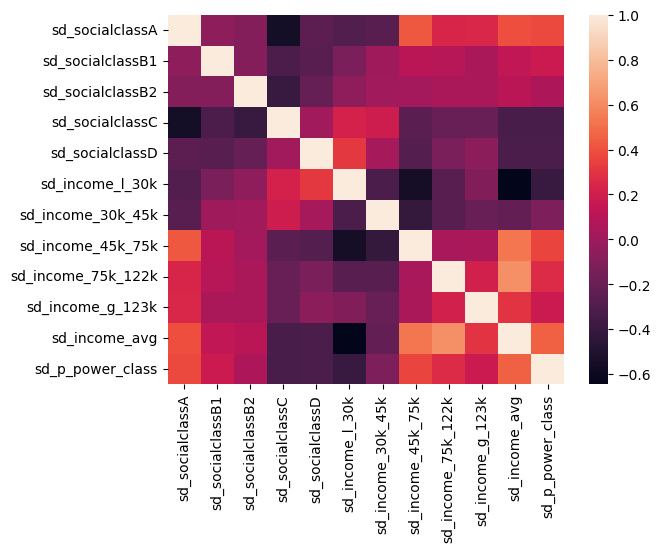

In [ ]:
# corellation of income variables

corr1 = df_sc .corr()
sns.heatmap(corr1,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_2_income_columns.png", dpi=300)

positive corellation in these attributes

( sd_income_avg , sd_income_75k_122k), (sd_socialclassA, sd_income_avg)

negative corellation in (sd_income_l_30k, sd_income_avg)



**Checking average income field**


In [ ]:
df_inc=df_ori.groupby(['sd_income_l_30k', 'sd_income_30k_45k', 'sd_income_45k_75k', 'sd_income_75k_122k', 'sd_income_g_123k', 'sd_income_avg']).size().reset_index(name='counts')
df_inc

sd_income_l_30k  sd_income_30k_45k  sd_income_45k_75k  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  1   
..               ...                ...                ...   
618                8                  1                  0   
619                8                  1                  1   
620                8                  1                  1   
621                9                  0                  0   
622                9                  0                  0   

     sd_income_75k_122k  sd_income_g_123k  sd_income_avg  counts  
0                     0                 9              0       1  
1                     5                 4              0       1  
2                     9                 0              0       1  
3                     9                 0              8       3  
4                     2                 7              0       1  
..                  ...               ...            ...     ...  
618                   0                 1              2       1  
619                   0                 0              1       1  
620                   0                 0              2      29  
621                   0                 0              1      26  
622                   0                 0              2      25  

[623 rows x 7 columns]

In [ ]:
df_inc.loc[[555 ]]

sd_income_l_30k  sd_income_30k_45k  sd_income_45k_75k  \
555                5                  4                  0   

     sd_income_75k_122k  sd_income_g_123k  sd_income_avg  counts  
555                   0                 0              2     121

Understanding variable contents as this.
In the particular postal code where customer live, 50%- 62% people have income less than 30,000 and 37%-49% people have income between 30,000 - 40,000. 11%-23% people are in average income level.

Here also we can consider  'sd_income_avg' independently of other income variables.

**Checking average income and purchasing power attributes.**

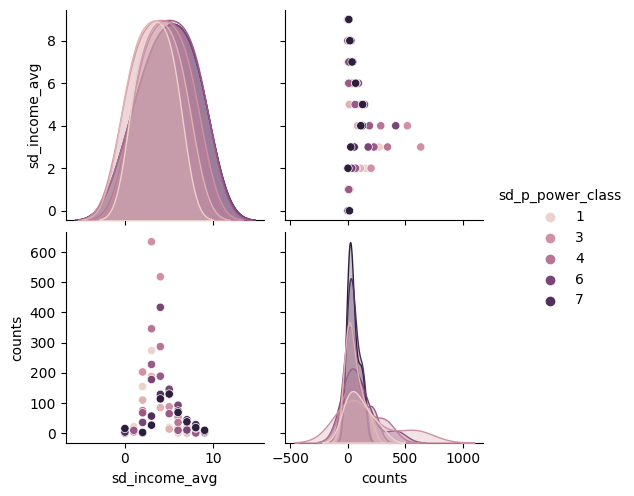

In [ ]:
df_inc2=df_ori.groupby([ 'sd_income_avg','sd_p_power_class']).size().reset_index(name='counts')
sns.pairplot(df_inc2, hue="sd_p_power_class")

we notice higher frequency of high purchasing power around income average 4 and 5  (37% - 62% in average income)

In [ ]:
#df_ori.groupby(['sd_socialclassA', 'sd_socialclassB1', 'sd_socialclassB2', 'sd_socialclassC', 'sd_socialclassD']).size().reset_index(name='counts')
df_ori.groupby(['sd_socialclassA', 'sd_socialclassB1', 'sd_socialclassB2', 'sd_socialclassC', 'sd_socialclassD','sd_income_l_30k', 'sd_income_30k_45k', 'sd_income_45k_75k', 'sd_income_75k_122k', 'sd_income_g_123k', 'sd_income_avg', 'sd_p_power_class']).size().reset_index(name='counts')

sd_socialclassA  sd_socialclassB1  sd_socialclassB2  sd_socialclassC  \
0                   0                 0                 0                0   
1                   0                 0                 0                2   
2                   0                 0                 0                3   
3                   0                 0                 0                3   
4                   0                 0                 0                4   
...               ...               ...               ...              ...   
1662                9                 0                 0                0   
1663                9                 0                 0                0   
1664                9                 0                 0                0   
1665                9                 0                 0                0   
1666                9                 0                 0                0   

      sd_socialclassD  sd_income_l_30k  sd_income_30k_45k  sd_income_45k_75k  \
0                   9                2                  2                  2   
1                   7                4                  3                  2   
2                   6                5                  4                  0   
3                   6                9                  0                  0   
4                   5                0                  0                  9   
...               ...              ...                ...                ...   
1662                0                0                  2                  5   
1663                0                4                  2                  3   
1664                0                4                  2                  3   
1665                0                5                  3                  2   
1666                0                9                  0                  0   

      sd_income_75k_122k  sd_income_g_123k  sd_income_avg  sd_p_power_class  \
0                      2                 2              6                 4   
1                      0                 0              3                 2   
2                      0                 0              2                 3   
3                      0                 0              1                 2   
4                      0                 0              6                 8   
...                  ...               ...            ...               ...   
1662                   2                 0              6                 8   
1663                   0                 0              3                 3   
1664                   0                 0              3                 4   
1665                   0                 1              3                 5   
1666                   0                 0              1                 3   

      counts  
0          1  
1          3  
2          4  
3          1  
4          1  
...      ...  
1662       5  
1663       1  
1664       3  
1665       1  
1666       1  

[1667 rows x 13 columns]

**1.4 Detecting Outliers**

In [ ]:
#import plotly.express as px
# checking outliers of relationship variables
px.box(df_rel)

In [ ]:
# checking outliers of religion variables
px.box(df_rela)

In [ ]:
# Checking outliers of education variables
px.box(df_edu)

In [ ]:
# outliers of income variables
px.box(df_sc)

In [ ]:
# outliers  of product variables - contribution to insurance policy
df_po_ins = df_ori[['po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ]]
px.box(df_po_ins)


Output hidden; open in https://colab.research.google.com to view.

we notice contributing to insurance policy attributes doesnot provide much information gain other than following.

po_ins_pol_thirdparty_pvt,  po_ins_pol_car, po_ins_pol_fire

In [ ]:
# outliers  of product variables - contribution to insurance policy'
df_po_no_ins = df_ori[['po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]]
px.box(df_po_no_ins)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# checking the profile of with 8 motorcycle policies
df_po_no_ins = df_ori[['po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' , 'po_ins_pol_caravan']]
df_po_no_ins.loc[df_po_no_ins['po_no_ins_pol_motorcycle_sc']  ==8]


po_no_ins_pol_thirdparty_pvt  po_no_ins_pol_thirdparty_firms  \
423                             0                               0   

     po_no_ins_pol_thirdparty_agri  po_no_ins_pol_car  po_no_ins_pol_del_van  \
423                              0                  1                      0   

     po_no_ins_pol_motorcycle_sc  po_no_ins_pol_lorry  po_no_ins_pol_trailer  \
423                            8                    0                      0   

     po_no_ins_pol_tractor  po_no_ins_pol_agri_machines  ...  \
423                      0                            0  ...   

     po_no_ins_pol_accident_ins_pvt  po_no_ins_pol_accident_ins_fam  \
423                               0                               0   

     po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
423                         0                   0                        0   

     po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
423                   0                      0                       0   

     po_no_ins_pol_social security  po_ins_pol_caravan  
423                              0                   0  

[1 rows x 22 columns]

In [ ]:
df_po_ins

**1.4 Normalizing/standardizing the data**



In [ ]:
# copy the data
df_max_scaled = df_ori.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0            0.804878              0.1               0.6         0.333333   
1            0.902439              0.1               0.4         0.333333   
2            0.902439              0.1               0.4         0.333333   
3            0.219512              0.1               0.6         0.500000   
4            0.975610              0.1               0.8         0.333333   
...               ...              ...               ...              ...   
5817         0.878049              0.1               0.2         0.333333   
5818         0.853659              0.1               0.8         0.666667   
5819         0.804878              0.1               0.6         0.666667   
5820         0.829268              0.1               0.6         0.333333   
5821         0.804878              0.1               0.6         0.500000   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                  0.8              0.000000                0.555556   
1                  0.8              0.111111                0.444444   
2                  0.8              0.000000                0.444444   
3                  0.3              0.222222                0.333333   
4                  1.0              0.111111                0.444444   
...                ...                   ...                     ...   
5817               0.8              0.000000                0.666667   
5818               0.8              0.111111                0.444444   
5819               0.8              0.000000                0.666667   
5820               0.8              0.000000                0.777778   
5821               0.8              0.000000                0.666667   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                   0.2        0.333333        0.777778  ...   
1                   0.2        0.444444        0.666667  ...   
2                   0.4        0.444444        0.333333  ...   
3                   0.4        0.444444        0.555556  ...   
4                   0.2        0.444444        0.777778  ...   
...                 ...             ...             ...  ...   
5817                0.2        0.222222        0.111111  ...   
5818                0.2        0.444444        0.666667  ...   
5819                0.0        0.333333        0.555556  ...   
5820                0.0        0.222222        0.777778  ...   
5821                0.2        0.222222        0.777778  ...   

      po_no_ins_pol_accident_ins_pvt  po_no_ins_pol_accident_ins_fam  \
0                                0.0                             0.0   
1                                0.0                             0.0   
2                                0.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   
...                              ...                             ...   
5817                             0.0                             0.0   
5818                             0.0                             0.0   
5819                             0.0                             0.0   
5820                             0.0                             0.0   
5821                             0.0                             0.0   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
0                          0.0            0.142857                      0.0   
1                          0.0            0.142857                      0.0   
2                          0.0            0.142857                      0.0   
3                          0.0            0.142857                      0.0   
4                          0.0            0.142857                      0.0   
...                        ...                 ...                      ...   
5817                       0.

**1.5 Carrying out variable transformations**


Look at Caravan customers by zip code

since the sociodemographic data  variables are based on postal code, Here we are tryong to identify records from same postal code and give an arbitrary zipcode no.
This is to analyse variables by location, to find patterns in data.

In [46]:
# separate sociodemographic variables
df= df_max_scaled
df_sd = df[df.columns[pd.Series(df.columns).str.startswith('sd_')]]
columns = df_sd.columns.tolist()
df['sd_combined'] = df.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)
# sort by combined
dfi=df.sort_values([ 'sd_combined'])

In [47]:
# create one column id_zipcode concaternating all sociodemographic  data.
df['id_zipcode'] = df.groupby('sd_combined', sort=False).ngroup() + 1
df.head(10)

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0         0.804878              0.1               0.6         0.333333   
1         0.902439              0.1               0.4         0.333333   
2         0.902439              0.1               0.4         0.333333   
3         0.219512              0.1               0.6         0.500000   
4         0.975610              0.1               0.8         0.333333   
5         0.560976              0.1               0.4         0.166667   
6         0.951220              0.2               0.6         0.333333   
7         0.804878              0.1               0.4         0.500000   
8         0.804878              0.1               0.4         0.666667   
9         0.268293              0.2               0.6         0.500000   

   sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0               0.8              0.000000                0.555556   
1               0.8              0.111111                0.444444   
2               0.8              0.000000                0.444444   
3               0.3              0.222222                0.333333   
4               1.0              0.111111                0.444444   
5               0.5              0.000000                0.555556   
6               0.9              0.222222                0.222222   
7               0.8              0.000000                0.777778   
8               0.8              0.000000                0.111111   
9               0.3              0.333333                0.555556   

   sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                0.2        0.333333        0.777778  ...   
1                0.2        0.444444        0.666667  ...   
2                0.4        0.444444        0.333333  ...   
3                0.4        0.444444        0.555556  ...   
4                0.2        0.444444        0.777778  ...   
5                0.0        0.555556        0.000000  ...   
6                0.0        0.555556        0.777778  ...   
7                0.0        0.222222        0.777778  ...   
8                0.6        0.666667        0.666667  ...   
9                0.0        0.222222        0.777778  ...   

   po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
0                       0.0            0.142857                      0.0   
1                       0.0            0.142857                      0.0   
2                       0.0            0.142857                      0.0   
3                       0.0            0.142857                      0.0   
4                       0.0            0.142857                      0.0   
5                       0.0            0.000000                      0.0   
6                       0.0            0.000000                      0.0   
7                       0.0            0.000000                      0.0   
8                       0.0            0.000000                      0.0   
9                       0.0            0.142857                      0.0   

   po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
0                 0.0                    0.0                     0.0   
1                 0.0                    0.0                     0.0   
2                 0.0                    0.0                     0.0   
3                 0.0                    0.0                     0.0   
4                 0.0                    0.0                     0.0   
5                 0.0                    0.0                     0.0   
6                 0.0                    0.0                     0.0   
7                 0.0                    0.0                     0.0   
8                 0.0                    0.0                     0.0   
9                 0.0                    0.0                     0.0   

   po_no_ins_pol_social security  po_ins_pol_caravan  \
0                            0.0                 0.0   
1             

In [48]:
# checking one sample
dd=df[df_ori['id_zipcode'] == 1730]
dd[['sd_combined', 'id_zipcode']]

<ipython-input-48-a748cc6a4567>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



sd_combined  id_zipcode
181   0.21951219512195122_0.2_0.6_0.3333333333333333...         169
470   0.21951219512195122_0.2_0.6_0.3333333333333333...         169
1254  0.21951219512195122_0.2_0.6_0.3333333333333333...         169
1585  0.21951219512195122_0.2_0.6_0.3333333333333333...         169
5124  0.21951219512195122_0.2_0.6_0.3333333333333333...         169
5126  0.21951219512195122_0.2_0.6_0.3333333333333333...         169

**1.6 Feature engineering**
